# For Two Stocks - Data collection,plotting,checking cointegration

In [7]:
import yfinance as yf
import pandas as pd

# Define ticker symbols for NSE stocks
tickers = ["HDFCBANK.NS", "KOTAKBANK.NS"]

# Download 1-minute data for the last day
def download_minute_data(ticker):
    data = yf.download(ticker, interval="1d",period="1y")
    return data

# Download and save data for both stocks
data_hdfc = download_minute_data("HDFCBANK.NS")
data_kotak = download_minute_data("KOTAKBANK.NS")

# Save to CSV
data_hdfc.to_csv("HDFC_1min_data.csv")
data_kotak.to_csv("Kotak_1min_data.csv")

print("Downloaded and saved 1-minute data for HDFC and Kotak Bank.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded and saved 1-minute data for HDFC and Kotak Bank.


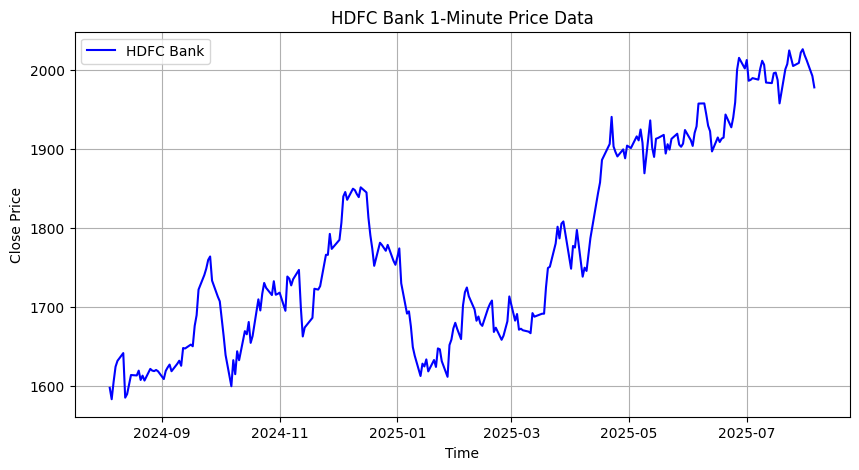

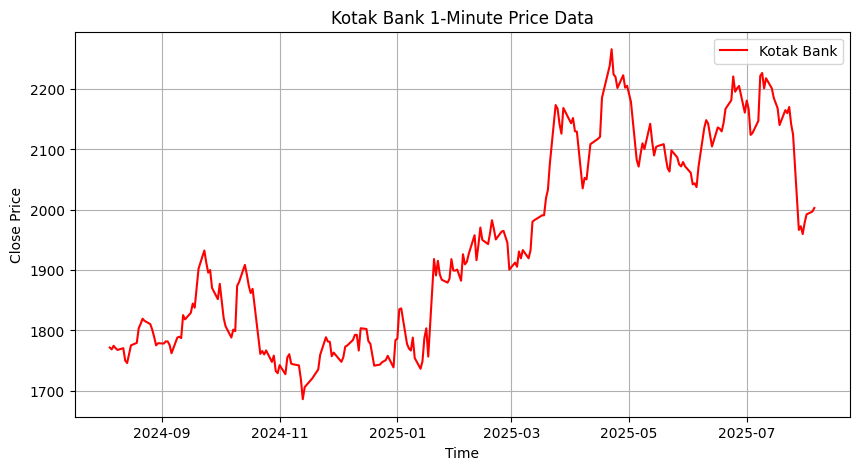

In [8]:
import matplotlib.pyplot as  plt
# Plot data separately
plt.figure(figsize=(10, 5))
plt.plot(data_hdfc.index, data_hdfc['Close'], label='HDFC Bank', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('HDFC Bank 1-Minute Price Data')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(data_kotak.index, data_kotak['Close'], label='Kotak Bank', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Kotak Bank 1-Minute Price Data')
plt.legend()
plt.grid()
plt.show()

In [9]:
data=pd.concat([data_hdfc['Close'],data_kotak['Close']],axis=1)

In [11]:
data.corr()

Ticker,HDFCBANK.NS,KOTAKBANK.NS
Ticker,,
HDFCBANK.NS,1.000000,0.738407
KOTAKBANK.NS,0.738407,1.000000


In [13]:
from statsmodels.tsa.stattools import adfuller

In [12]:
# Function to check stationarity
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"{name} ADF Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print(f"{name} series is stationary.")
    else:
        print(f"{name} series is NOT stationary.")
    print("\n")

In [14]:
# Check stationarity
check_stationarity(data_hdfc['Close'], "HDFC Bank")
check_stationarity(data_kotak['Close'], "Kotak Bank")

HDFC Bank ADF Test:
ADF Statistic: -1.1288354446244555
p-value: 0.7034367730718963
Critical Values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544
HDFC Bank series is NOT stationary.


Kotak Bank ADF Test:
ADF Statistic: -1.5623914349034933
p-value: 0.5024528747252843
Critical Values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544
Kotak Bank series is NOT stationary.




In [15]:
# Function to check cointegration
def check_cointegration(series1, series2, name1, name2):
    score, p_value, _ = coint(series1.dropna(), series2.dropna())
    print(f"Cointegration Test between {name1} and {name2}:")
    print(f"Test Statistic: {score}")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print(f"{name1} and {name2} are cointegrated.")
    else:
        print(f"{name1} and {name2} are NOT cointegrated.")
    print("\n")

In [16]:
# Check cointegration
check_cointegration(data_hdfc['Close'], data_kotak['Close'], "HDFC Bank", "Kotak Bank")

Cointegration Test between HDFC Bank and Kotak Bank:
Test Statistic: -1.5017187067682318
p-value: 0.760532432921114
HDFC Bank and Kotak Bank are NOT cointegrated.




# Banking Stocks ( Start- 04/04/2024 - End - 04/04/2025 )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


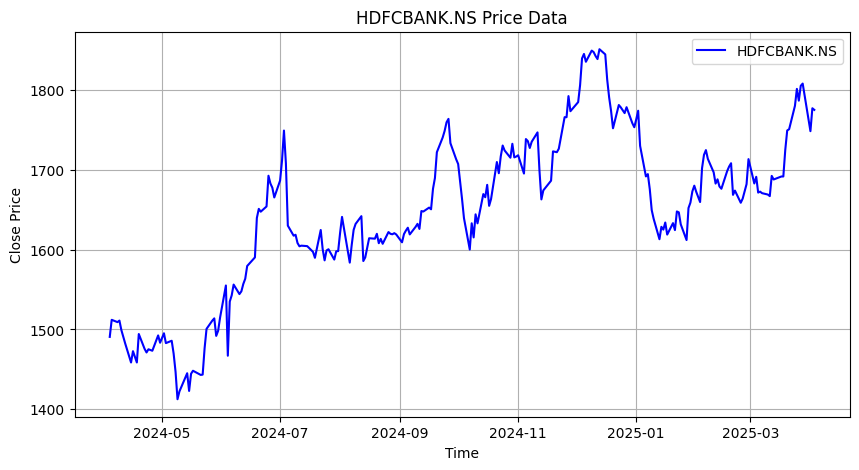

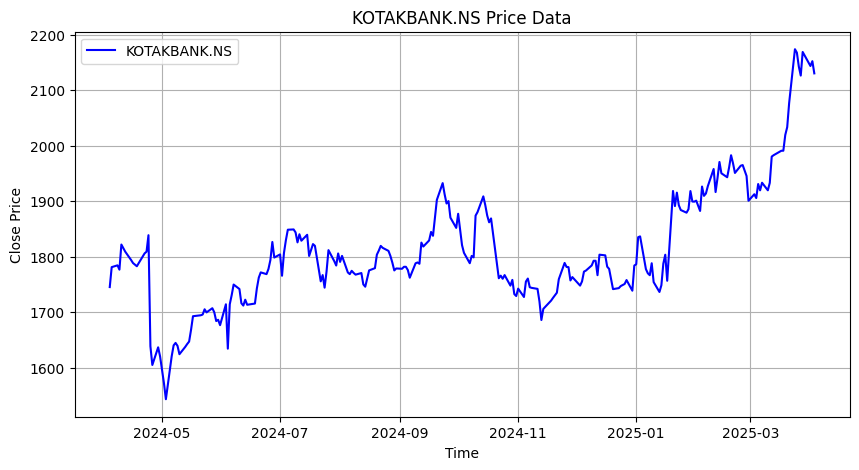

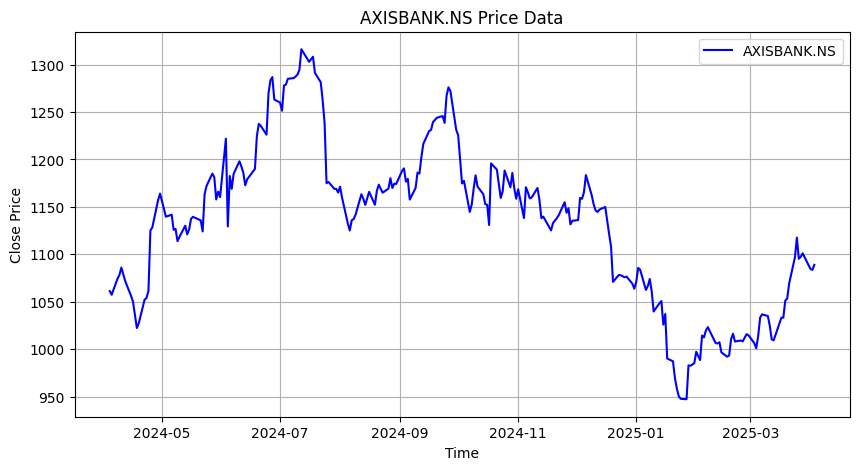

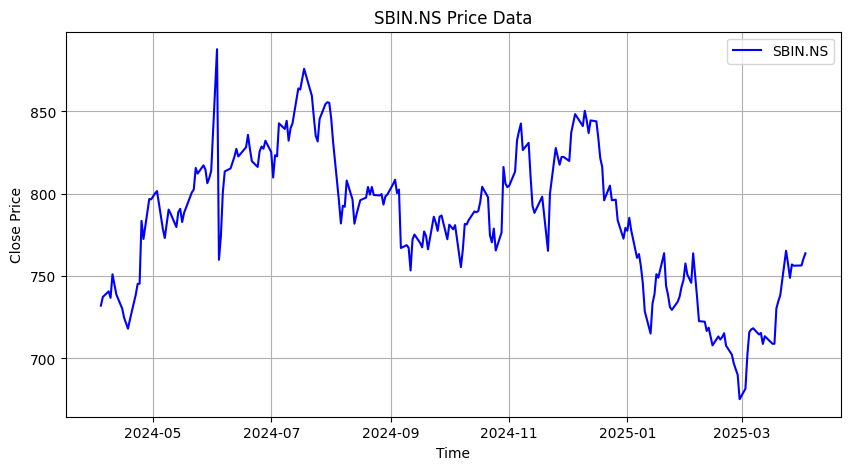

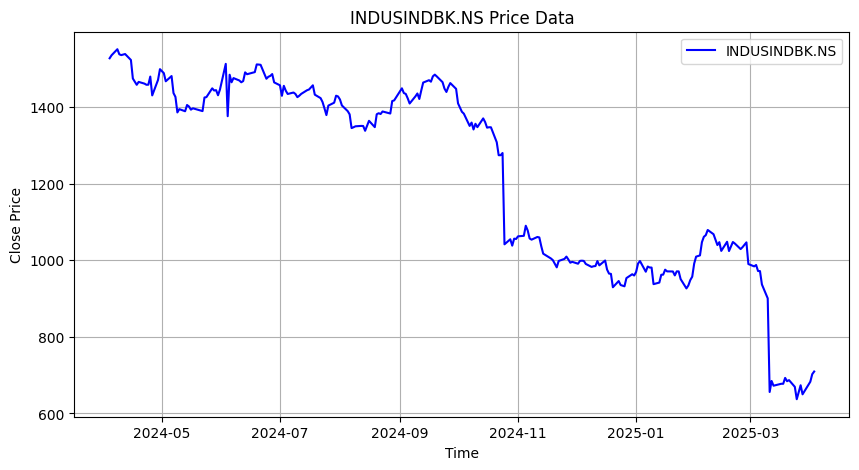

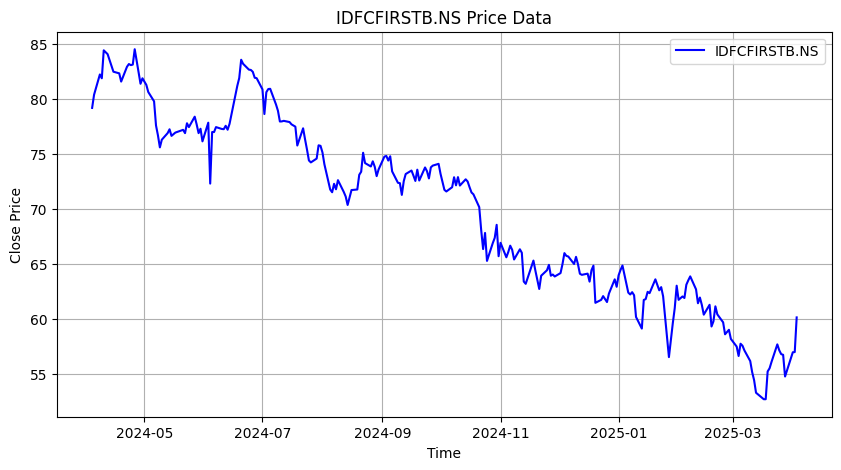

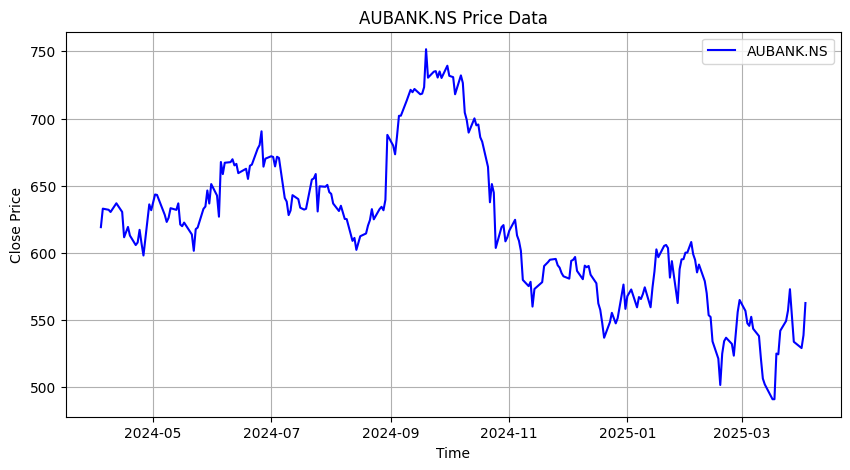

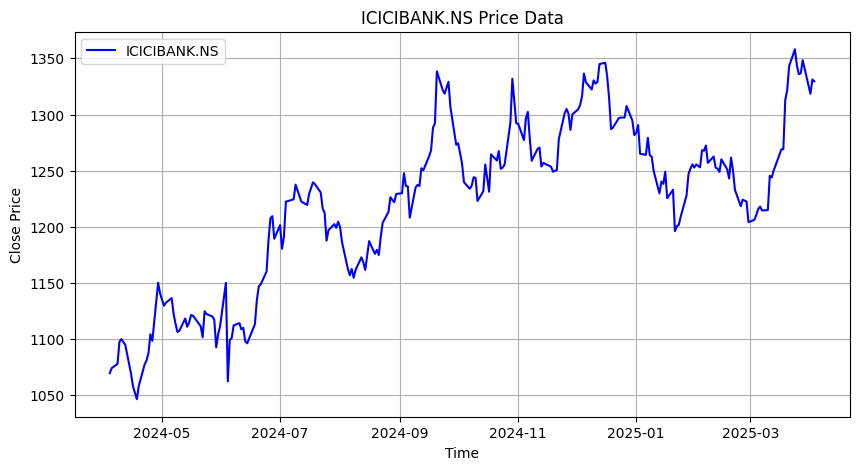

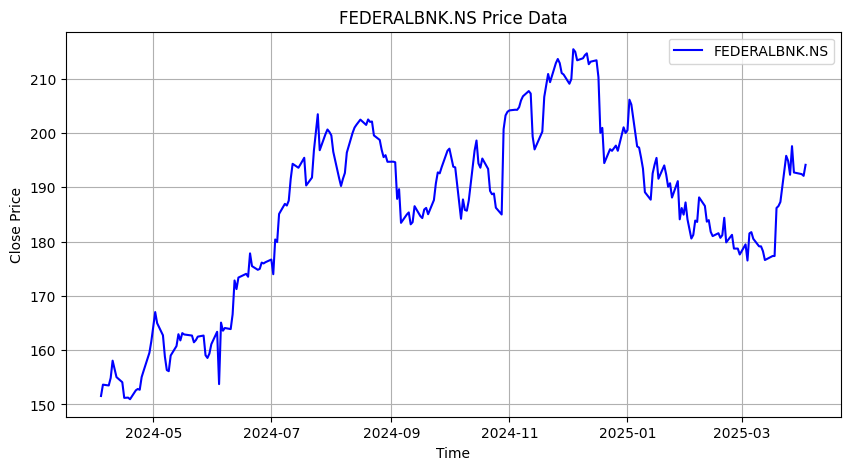

HDFCBANK.NS ADF Test:
ADF Statistic: -1.7997502878059592
p-value: 0.380585675826536
Critical Values:
   1%: -3.457105309726321
   5%: -2.873313676101283
   10%: -2.5730443824681606
HDFCBANK.NS series is NOT stationary.


KOTAKBANK.NS ADF Test:
ADF Statistic: -0.7645276020218023
p-value: 0.8293204480484965
Critical Values:
   1%: -3.457215237265747
   5%: -2.873361841566324
   10%: -2.5730700760129555
KOTAKBANK.NS series is NOT stationary.


AXISBANK.NS ADF Test:
ADF Statistic: -1.7376856226797106
p-value: 0.4118077150896796
Critical Values:
   1%: -3.4573260719088132
   5%: -2.873410402808354
   10%: -2.573095980841316
AXISBANK.NS series is NOT stationary.


SBIN.NS ADF Test:
ADF Statistic: -2.172497550861538
p-value: 0.21637822245639443
Critical Values:
   1%: -3.4573260719088132
   5%: -2.873410402808354
   10%: -2.573095980841316
SBIN.NS series is NOT stationary.


INDUSINDBK.NS ADF Test:
ADF Statistic: -0.26239938184955064
p-value: 0.930663461250497
Critical Values:
   1%: -3.45732

In [30]:
# Define ticker symbols for NSE stocks
tickers = [
    "HDFCBANK.NS", "KOTAKBANK.NS", "AXISBANK.NS", "SBIN.NS", 
    "INDUSINDBK.NS", "IDFCFIRSTB.NS", "AUBANK.NS", "ICICIBANK.NS", "FEDERALBNK.NS"
]

# Download 1-minute data for the last day
def download_minute_data(ticker):
    data = yf.download(ticker, interval="1d", start="2024-04-04",end="2025-04-04")
    return data

# Function to check stationarity
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"{name} ADF Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print(f"{name} series is stationary.")
    else:
        print(f"{name} series is NOT stationary.")
    print("\n")

# Function to check cointegration
def check_cointegration(series1, series2, name1, name2):
    score, p_value, _ = coint(series1.dropna(), series2.dropna())
    print(f"Cointegration Test between {name1} and {name2}:")
    print(f"Test Statistic: {score}")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print(f"{name1} and {name2} are cointegrated.")
    else:
        print(f"{name1} and {name2} are NOT cointegrated.")
    print("\n")

# Download and save data for all stocks
data_dict = {}
for ticker in tickers:
    data_dict[ticker] = download_minute_data(ticker)
    data_dict[ticker].to_csv(f"{ticker}_1min_data.csv")

# Plot data separately
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    plt.plot(data_dict[ticker].index, data_dict[ticker]['Close'], label=ticker, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f'{ticker} Price Data')
    plt.legend()
    plt.grid()
    plt.show()

# Check stationarity
for ticker in tickers:
    check_stationarity(data_dict[ticker]['Close'], ticker)

# Check cointegration between all pairs
for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        check_cointegration(data_dict[tickers[i]]['Close'], data_dict[tickers[j]]['Close'], tickers[i], tickers[j])

print("Downloaded, data, checked stationarity, and performed cointegration tests for all stocks.")

In [31]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller, coint
import matplotlib.pyplot as plt

def analyze_stocks(
    tickers, 
    period=None, 
    interval=None, 
    start=None, 
    end=None, 
    plot=True, 
    save_csv=True
):
    """
    Download data, check stationarity, cointegration, and plot/CSV for any given tickers.
    :param tickers: list of stock symbols
    :param period: e.g. '1y', '6mo', etc.
    :param interval: e.g. '1m', '5m', '1d', etc.
    :param start: start date string (YYYY-MM-DD)
    :param end: end date string (YYYY-MM-DD)
    :param plot: whether to plot closing prices
    :param save_csv: whether to save CSVs
    :return: data_dict, stationarity_results, cointegration_results
    """
    # Download data
    data_dict = {}
    for ticker in tickers:
        data = yf.download(
            ticker, 
            period=period, 
            interval=interval, 
            start=start, 
            end=end, 
            progress=False
        )
        data_dict[ticker] = data
        if save_csv and not data.empty:
            data.to_csv(f"{ticker}_data.csv")
            
    # Stationarity Check
    stationarity_results = []
    for ticker in tickers:
        close = data_dict[ticker]['Close'].dropna()
        if close.empty: continue
        result = adfuller(close)
        stat = {
            "Ticker": ticker,
            "ADF Statistic": result[0],
            "p-value": result[1],
            "Critical Values": result[4],
            "Stationary": result[1] < 0.05
        }
        stationarity_results.append(stat)
        print(f"{ticker} ADF Test: {stat}")
        
    # Cointegration Check
    cointegration_results = []
    for i in range(len(tickers)):
        for j in range(i + 1, len(tickers)):
            s1 = data_dict[tickers[i]]['Close'].dropna()
            s2 = data_dict[tickers[j]]['Close'].dropna()
            # Align on index
            cdf = pd.concat([s1, s2], axis=1).dropna()
            if cdf.empty: continue
            score, pvalue, _ = coint(cdf.iloc[:,0], cdf.iloc[:,1])
            res = {
                "Stock 1": tickers[i],
                "Stock 2": tickers[j],
                "Test Statistic": score,
                "p-value": pvalue,
                "Cointegrated": pvalue < 0.05
            }
            cointegration_results.append(res)
            print(f"{tickers[i]} vs {tickers[j]}: p={pvalue:.4g}, {'Cointegrated' if pvalue < 0.05 else 'NOT Cointegrated'}")
    
    # Plot Closing Prices
    if plot:
        for ticker in tickers:
            plt.figure(figsize=(12,5))
            plt.plot(data_dict[ticker].index, data_dict[ticker]['Close'], label=ticker)
            plt.title(f"{ticker} Close Price")
            plt.xlabel("Time")
            plt.ylabel("Close Price")
            plt.legend()
            plt.grid(True)
            plt.show()
    
    return data_dict, stationarity_results, cointegration_results

# Example Usage:
# tickers = ["HDFCBANK.NS", "SBIN.NS"]
# analyze_stocks(tickers, period="1y", interval="1d")


In [21]:
# Create a list to store cointegrated pairs and their p-values
cointegrated_pairs = []

# Check cointegration between all pairs and store those with p-value < 0.05
for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        series1 = data_dict[tickers[i]]['Close'].dropna()
        series2 = data_dict[tickers[j]]['Close'].dropna()
        score, p_value, _ = coint(series1, series2)
        if p_value < 0.05:
            cointegrated_pairs.append({
                'Stock 1': tickers[i],
                'Stock 2': tickers[j],
                'p-value': p_value
            })

# Convert to DataFrame and sort by p-value
cointegrated_df = pd.DataFrame(cointegrated_pairs)
cointegrated_df = cointegrated_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)

# Display the table
print("Cointegrated Stock Pairs (p-value < 0.05):")
print(cointegrated_df)


Cointegrated Stock Pairs (p-value < 0.05):
       Stock 1       Stock 2   p-value
0  HDFCBANK.NS  ICICIBANK.NS  0.007702


In [53]:
# === FUNCTION-BASED PAIRS TRADING STRATEGY ===

def pairs_trading_strategy(stock1_name, stock2_name, data_dict, rolling_window=60, k=1.5, initial_capital=10000):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    from statsmodels.tsa.stattools import adfuller

    # === PRICE PLOT ===
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.set_xlabel('Time')
    ax1.set_ylabel(f'{stock1_name} Price', color='tab:blue')
    ax1.plot(data_dict[stock1_name].index, data_dict[stock1_name]['Close'], label=stock1_name, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel(f'{stock2_name} Price', color='tab:orange')
    ax2.plot(data_dict[stock2_name].index, data_dict[stock2_name]['Close'], label=stock2_name, color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'1-Minute Price Comparison: {stock1_name} vs {stock2_name}')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

    # === STATIC SPREAD & ADF TEST ===
    x = data_dict[stock2_name]['Close'].dropna()
    y = data_dict[stock1_name]['Close'].dropna()
    df_pair = pd.concat([y, x], axis=1).dropna()
    y, x = df_pair[stock1_name], df_pair[stock2_name]

    x_const = sm.add_constant(x)
    model = sm.OLS(y, x_const).fit()
    beta = model.params[stock2_name]
    spread = y - beta * x


    adf_result = adfuller(spread.dropna())
    print("ADF Test on Spread:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")
    if adf_result[1] < 0.05:
        print("✅ The spread is stationary (reject H0).")
    else:
        print("❌ The spread is NOT stationary (fail to reject H0).")

    # === ROLLING OLS ===
    y = df_pair[stock1_name]
    x = df_pair[stock2_name]

    spread_list = []
    mean_list = []
    std_list = []
    upper_bound = []
    lower_bound = []

    for i in range(rolling_window, len(df_pair)):
        y_window = y[i - rolling_window:i]
        x_window = x[i - rolling_window:i]

        x_window_const = sm.add_constant(x_window)
        model = sm.OLS(y_window, x_window_const).fit()
        beta = model.params.iloc[1]
        intercept = model.params.iloc[0]

        spread_i = y.iloc[i] - (intercept + beta * x.iloc[i])
        spread_list.append(spread_i)

        spread_series = y_window - (intercept + beta * x_window)
        mu = spread_series.mean()
        sigma = spread_series.std()

        mean_list.append(mu)
        std_list.append(sigma)
        upper_bound.append(mu + k * sigma)
        lower_bound.append(mu - k * sigma)

    rolling_df = df_pair.iloc[rolling_window:].copy()
    rolling_df['Spread'] = spread_list
    rolling_df['Mean'] = mean_list
    rolling_df['Upper'] = upper_bound
    rolling_df['Lower'] = lower_bound

    
    # === SIGNAL GENERATION ===
    signals = []
    position = 0

    for i in range(1, len(rolling_df)):
        spread_now = rolling_df['Spread'].iloc[i]
        spread_prev = rolling_df['Spread'].iloc[i - 1]
        upper = rolling_df['Upper'].iloc[i]
        lower = rolling_df['Lower'].iloc[i]
        mean = rolling_df['Mean'].iloc[i]

        if position == 0:
            if spread_prev >= lower and spread_now < lower:
                position = 1
            elif spread_prev <= upper and spread_now > upper:
                position = -1
        elif position == 1 and spread_prev <= mean and spread_now > mean:
            position = 0
        elif position == -1 and spread_prev >= mean and spread_now < mean:
            position = 0

        signals.append(position)

    signals = [0] * (len(rolling_df) - len(signals)) + signals
    rolling_df['Signal'] = signals

    # === SIGNAL PLOT ===
    long_entries = rolling_df[(rolling_df['Signal'].diff() == 1)]
    short_entries = rolling_df[(rolling_df['Signal'].diff() == -1)]
    exits = rolling_df[(rolling_df['Signal'].diff().abs() == 1) & (rolling_df['Signal'] == 0)]

    plt.figure(figsize=(14, 6))
    plt.plot(rolling_df.index, rolling_df['Spread'], label='Spread', color='gray')
    plt.plot(rolling_df.index, rolling_df['Mean'], linestyle='--', label='Mean', color='black')
    plt.plot(rolling_df.index, rolling_df['Upper'], linestyle='--', label='Upper Bound', color='red')
    plt.plot(rolling_df.index, rolling_df['Lower'], linestyle='--', label='Lower Bound', color='green')
    plt.scatter(long_entries.index, long_entries['Spread'], marker='^', color='green', s=80, label='Long Entry')
    plt.scatter(short_entries.index, short_entries['Spread'], marker='v', color='red', s=80, label='Short Entry')
    plt.scatter(exits.index, exits['Spread'], marker='x', color='blue', s=100, label='Exit', linewidth=2)
    plt.title("Pairs Trading Signals with Entry & Exit")
    plt.xlabel("Time")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === BACKTEST ===
    capital = initial_capital
    in_trade = False
    position = None
    entry_idx = None
    trade_log = []

    spread_series = rolling_df['Spread']
    mean_series = rolling_df['Mean']
    upper_series = rolling_df['Upper']
    lower_series = rolling_df['Lower']
    dates = rolling_df.index

    stock1 = df_pair[stock1_name].iloc[rolling_window:]
    stock2 = df_pair[stock2_name].iloc[rolling_window:]

    for i in range(1, len(rolling_df)):
        spread = spread_series.iloc[i]
        spread_prev = spread_series.iloc[i - 1]
        upper = upper_series.iloc[i]
        lower = lower_series.iloc[i]
        mean = mean_series.iloc[i]

        if not in_trade:
            if spread_prev <= upper and spread > upper:
                in_trade = True
                position = 'short'
                entry_idx = i
            elif spread_prev >= lower and spread < lower:
                in_trade = True
                position = 'long'
                entry_idx = i

        elif in_trade:
            if (position == 'short' and spread_prev >= mean and spread < mean) or \
               (position == 'long' and spread_prev <= mean and spread > mean):
                exit_idx = i

                entry_price1 = stock1.iloc[entry_idx]
                entry_price2 = stock2.iloc[entry_idx]
                exit_price1 = stock1.iloc[exit_idx]
                exit_price2 = stock2.iloc[exit_idx]

                cap_per_stock = capital / 2
                units1 = cap_per_stock / entry_price1
                units2 = cap_per_stock / entry_price2

                if position == 'long':
                    profit1 = units1 * (exit_price1 - entry_price1)
                    profit2 = units2 * (entry_price2 - exit_price2)
                else:
                    profit1 = units1 * (entry_price1 - exit_price1)
                    profit2 = units2 * (exit_price2 - entry_price2)

                trade_profit = profit1 + profit2
                capital += trade_profit

                trade_log.append({
                    'Entry Time': dates[entry_idx],
                    'Exit Time': dates[exit_idx],
                    'Position': position,
                    'Entry Price Stock1': entry_price1,
                    'Entry Price Stock2': entry_price2,
                    'Exit Price Stock1': exit_price1,
                    'Exit Price Stock2': exit_price2,
                    'Units Stock1': units1,
                    'Units Stock2': units2,
                    'Profit (₹)': trade_profit,
                    'Profit (%)': (trade_profit / initial_capital) * 100,
                    'Capital After Trade': capital
                })

                in_trade = False
                position = None
                entry_idx = None

    trade_log_df = pd.DataFrame(trade_log)
    total_profit = capital - initial_capital
    total_return_pct = (capital - initial_capital) / initial_capital * 100
    total_trades = len(trade_log_df)

    print("Trade Log:")
    print(trade_log_df)
    print(f"\nFinal Capital: ₹{round(capital, 2)}")
    print(f"Total Profit: ₹{round(total_profit, 2)}")
    print(f"Total Return: {round(total_return_pct, 2)}%")
    print(f"Total Trades Executed: {total_trades}")
    return trade_log_df, capital


In [28]:
# === Metrics for Evaluation ===
def evaluate_performance(trade_log_df, initial_capital):
    # Cumulative profit plot
    trade_log_df['Cumulative Profit'] = trade_log_df['Profit (₹)'].cumsum()
    trade_log_df['Return (%)'] = (trade_log_df['Cumulative Profit'] / initial_capital) * 100

    # Win rate
    win_rate = (trade_log_df['Profit (₹)'] > 0).sum() / len(trade_log_df) * 100

    # === Sharpe Ratio ===
    if trade_log_df['Profit (₹)'].std() != 0:
        sharpe = trade_log_df['Profit (₹)'].mean() / trade_log_df['Profit (₹)'].std() * np.sqrt(len(trade_log_df))
    else:
        sharpe = 0.0

    # Max Drawdown
    cumulative = trade_log_df['Cumulative Profit']
    peak = cumulative.cummax()
    drawdown = (peak - cumulative)
    max_drawdown = drawdown.max()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(trade_log_df['Exit Time'], trade_log_df['Cumulative Profit'], label='Cumulative Profit')
    plt.xlabel('Exit Time')
    plt.ylabel('Cumulative Profit (₹)')
    plt.title('Cumulative Profit Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary
    print(f"Total Trades: {len(trade_log_df)}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: ₹{max_drawdown:.2f}")
    print(f"Total Profit: ₹{trade_log_df['Profit (₹)'].sum():.2f}")
    print(f"Total Return: {trade_log_df['Return (%)'].iloc[-1]:.2f}%")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Total Profit: ₹{trade_log_df['Profit (₹)'].sum():.2f}")
    print(f"Total Return: {trade_log_df['Return (%)'].iloc[-1]:.2f}%")

    # Save to CSV
    trade_log_df.to_csv("trade_log.csv", index=False)
    print("✅ Trade log saved to trade_log.csv")

# Call this function after backtest_strategy()
# Example:
# trade_log_df, capital = backtest_strategy(...)
# evaluate_performance(trade_log_df, initial_capital)

# === Function-Based Integration Example ===
def pairs_trading_with_metrics(stock1_name, stock2_name, data_dict):
    trade_log_df, final_capital = pairs_trading_strategy(stock1_name, stock2_name, data_dict)
    evaluate_performance(trade_log_df, initial_capital=10000)


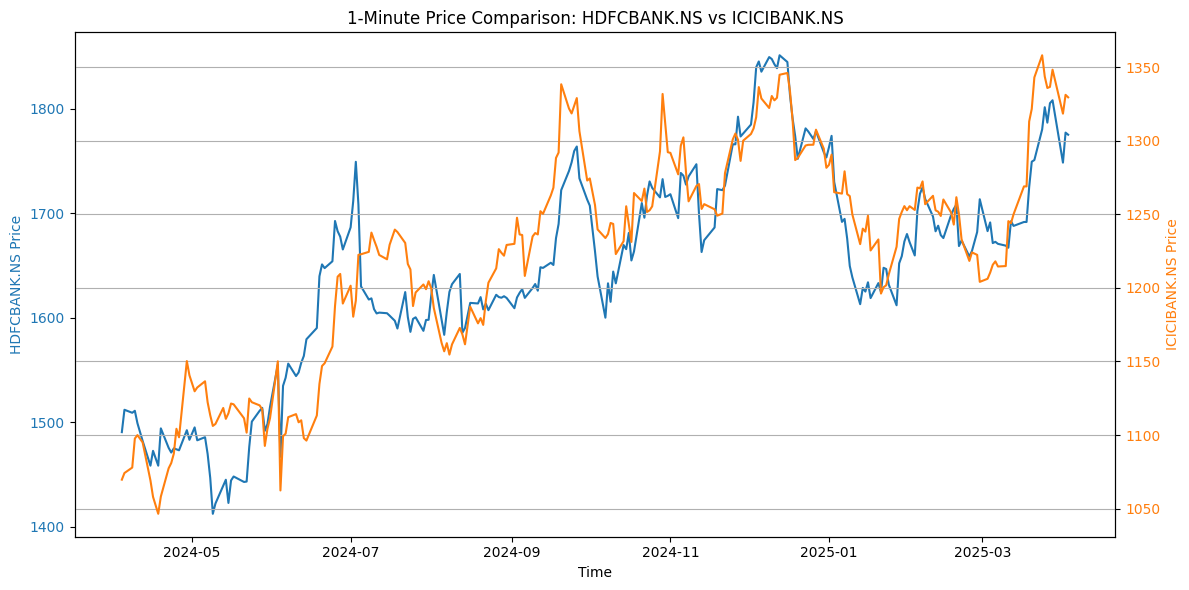

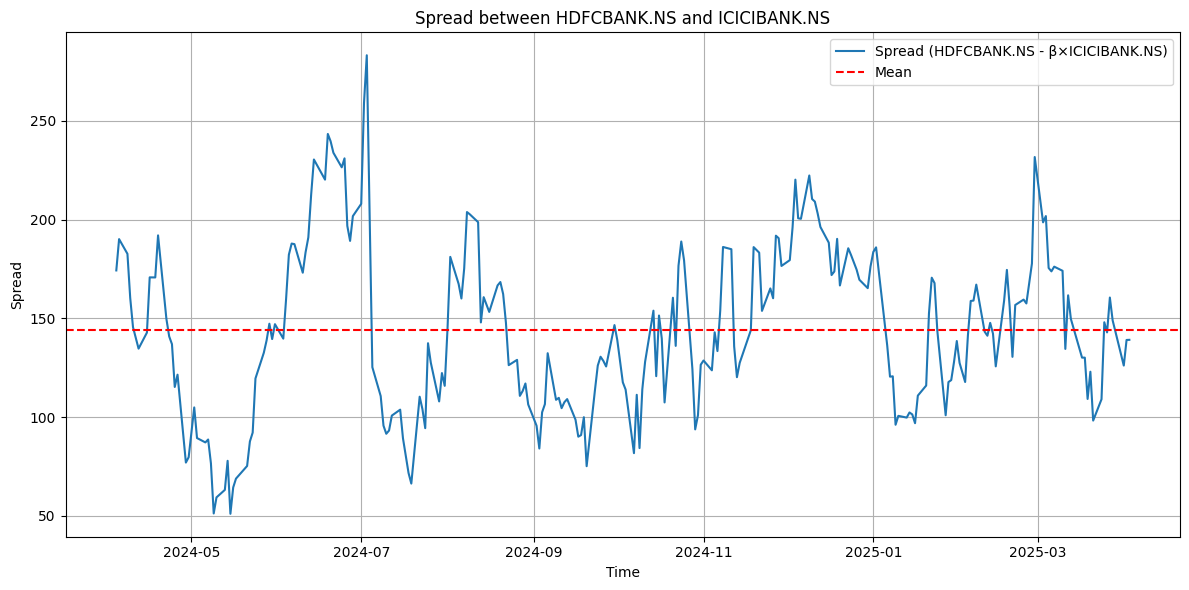

ADF Test on Spread:
ADF Statistic: -3.9705353031037927
p-value: 0.0015729036949993864
   1%: -3.457105309726321
   5%: -2.873313676101283
   10%: -2.5730443824681606
✅ The spread is stationary (reject H0).
Trade Log:
  Entry Time  Exit Time Position  Entry Price Stock1  Entry Price Stock2  \
0 2024-07-09 2024-07-25     long         1618.692627         1237.595825   
1 2024-10-07 2024-10-11     long         1600.196167         1233.900024   
2 2024-10-21 2024-10-29    short         1709.889282         1259.050049   
3 2024-11-08 2024-11-13    short         1735.359131         1258.849976   
4 2024-11-19 2024-12-27    short         1723.291992         1249.099976   
5 2025-01-09 2025-01-21     long         1649.652100         1262.400024   
6 2025-02-18 2025-02-20    short         1704.300903         1243.050049   
7 2025-02-24 2025-03-11    short         1658.850830         1218.349976   

   Exit Price Stock1  Exit Price Stock2  Units Stock1  Units Stock2  \
0        1599.009155       

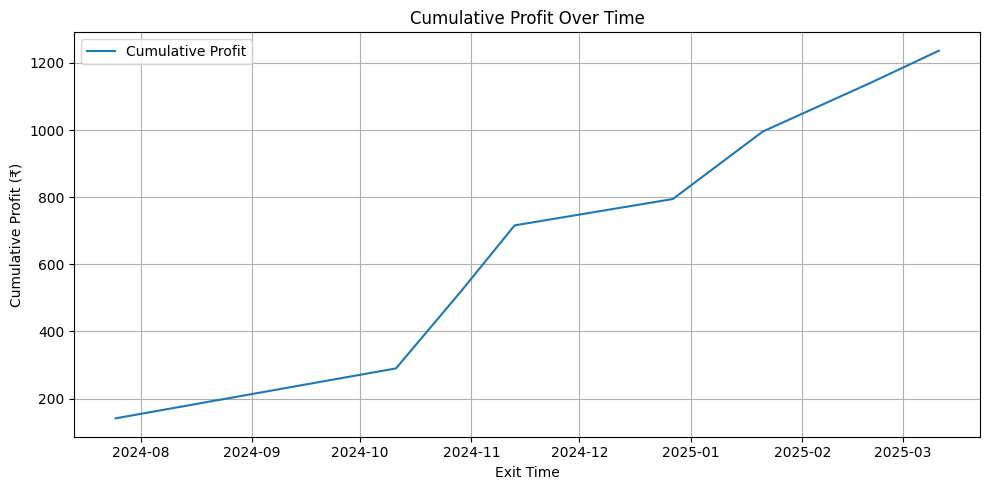

Total Trades: 8
Win Rate: 100.00%
Sharpe Ratio: 8.38
Max Drawdown: ₹0.00
Total Profit: ₹1236.46
Total Return: 12.36%
Win Rate: 100.00%
Sharpe Ratio: 8.38
Total Profit: ₹1236.46
Total Return: 12.36%
✅ Trade log saved to trade_log.csv


In [49]:
pairs_trading_with_metrics(stock1_name="HDFCBANK.NS", stock2_name="ICICIBANK.NS", data_dict=data_dict)

In [32]:
# 4 YEARS DATA

In [38]:
tickers = [
    "HDFCBANK.NS", "KOTAKBANK.NS", "AXISBANK.NS", "SBIN.NS", 
    "INDUSINDBK.NS", "IDFCFIRSTB.NS", "AUBANK.NS", "ICICIBANK.NS", "FEDERALBNK.NS"
]

analyze_stocks(tickers, 
    period=None, 
    interval="1d", 
    start="2020-01-01", 
    end="2024-12-31", 
    plot=False, 
    save_csv=True
)

HDFCBANK.NS ADF Test: {'Ticker': 'HDFCBANK.NS', 'ADF Statistic': np.float64(-1.535155855538068), 'p-value': np.float64(0.5160541445128092), 'Critical Values': {'1%': np.float64(-3.435651725648415), '5%': np.float64(-2.863881223119536), '10%': np.float64(-2.568016498910778)}, 'Stationary': np.False_}
KOTAKBANK.NS ADF Test: {'Ticker': 'KOTAKBANK.NS', 'ADF Statistic': np.float64(-2.443598848669226), 'p-value': np.float64(0.12980703832564028), 'Critical Values': {'1%': np.float64(-3.4356776419985953), '5%': np.float64(-2.863892657513944), '10%': np.float64(-2.5680225884063717)}, 'Stationary': np.False_}
AXISBANK.NS ADF Test: {'Ticker': 'AXISBANK.NS', 'ADF Statistic': np.float64(-1.0999971950348786), 'p-value': np.float64(0.7150730237511181), 'Critical Values': {'1%': np.float64(-3.4356819860439574), '5%': np.float64(-2.863894574114006), '10%': np.float64(-2.568023609111511)}, 'Stationary': np.False_}
SBIN.NS ADF Test: {'Ticker': 'SBIN.NS', 'ADF Statistic': np.float64(-0.27601987215034124),

({'HDFCBANK.NS': Price             Close         High          Low         Open      Volume
  Ticker      HDFCBANK.NS  HDFCBANK.NS  HDFCBANK.NS  HDFCBANK.NS HDFCBANK.NS
  Date                                                                      
  2020-01-01  1214.072510  1215.401879  1206.476248  1211.698678     1836849
  2020-01-02  1221.811279  1222.998195  1214.452400  1214.452400     3068583
  2020-01-03  1204.387329  1220.149549  1199.829526  1217.490811     5427775
  2020-01-06  1178.322510  1198.120358  1173.622369  1196.411153     5445093
  2020-01-07  1196.980835  1207.283241  1189.052261  1195.366676     7362247
  ...                 ...          ...          ...          ...         ...
  2024-12-23  1781.402710  1786.348303  1761.917121  1762.609455     5522296
  2024-12-24  1778.534180  1789.018813  1770.077288  1782.441271     7242917
  2024-12-26  1771.264160  1792.282931  1761.372974  1778.979334     5240839
  2024-12-27  1778.682617  1786.298783  1769.632157  1775.270

In [44]:
tickers = [
    "HDFCBANK.NS", "KOTAKBANK.NS", "AXISBANK.NS", "SBIN.NS", 
    "INDUSINDBK.NS", "IDFCFIRSTB.NS", "AUBANK.NS", "ICICIBANK.NS", "FEDERALBNK.NS"
]
get_cointegrated_pairs(tickers, period=None, 
    interval="1d", 
    start="2020-01-01", 
    end="2024-12-31")


[('KOTAKBANK.NS', 'AUBANK.NS'),
 ('AXISBANK.NS', 'SBIN.NS'),
 ('SBIN.NS', 'ICICIBANK.NS'),
 ('INDUSINDBK.NS', 'IDFCFIRSTB.NS'),
 ('INDUSINDBK.NS', 'AUBANK.NS'),
 ('ICICIBANK.NS', 'FEDERALBNK.NS')]

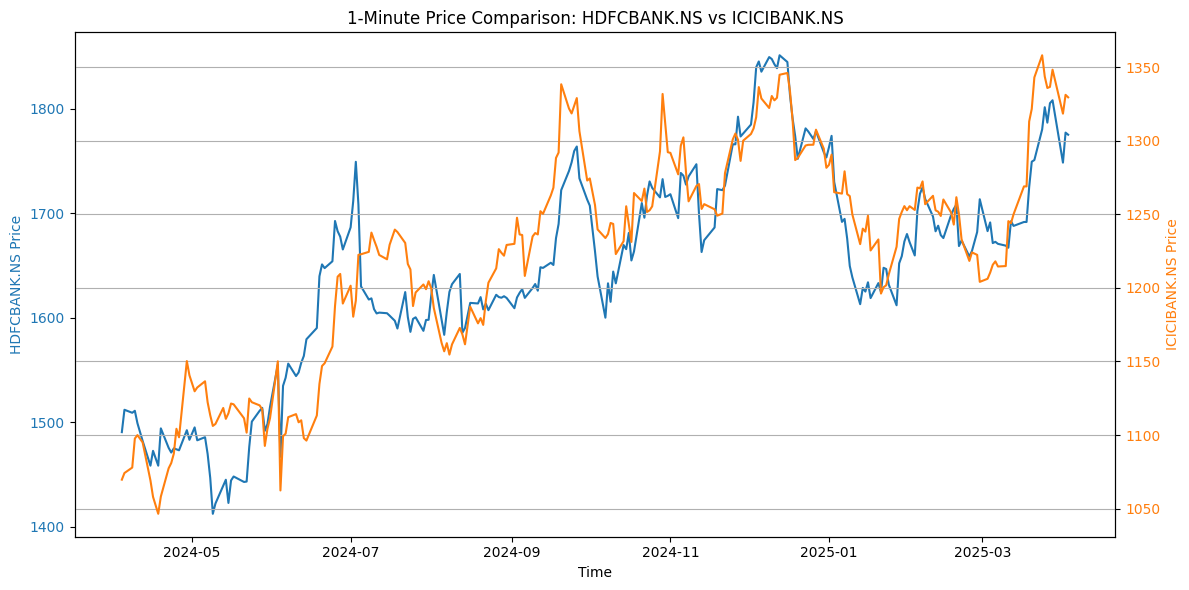

ADF Test on Spread:
ADF Statistic: -3.9705353031037927
p-value: 0.0015729036949993864
   1%: -3.457105309726321
   5%: -2.873313676101283
   10%: -2.5730443824681606
✅ The spread is stationary (reject H0).


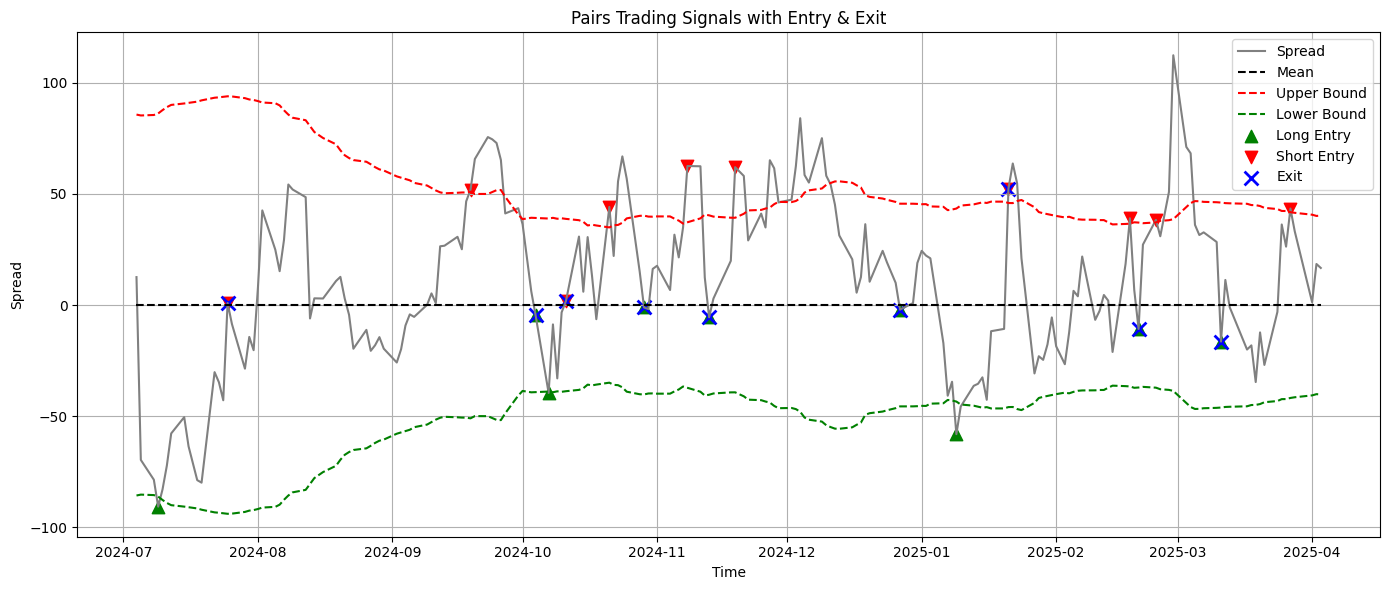

Trade Log:
  Entry Time  Exit Time Position  Entry Price Stock1  Entry Price Stock2  \
0 2024-07-09 2024-07-25     long         1618.692627         1237.595825   
1 2024-09-19 2024-10-04    short         1689.909180         1292.000000   
2 2024-10-07 2024-10-11     long         1600.196167         1233.900024   
3 2024-10-21 2024-10-29    short         1709.889282         1259.050049   
4 2024-11-08 2024-11-13    short         1735.359131         1258.849976   
5 2024-11-19 2024-12-27    short         1723.291992         1249.099976   
6 2025-01-09 2025-01-21     long         1649.652100         1262.400024   
7 2025-02-18 2025-02-20    short         1704.300903         1243.050049   
8 2025-02-24 2025-03-11    short         1658.850830         1218.349976   

   Exit Price Stock1  Exit Price Stock2  Units Stock1  Units Stock2  \
0        1599.009155        1187.675537      3.088913      4.040091   
1        1639.612549        1239.750000      3.000422      3.924490   
2        1633.0

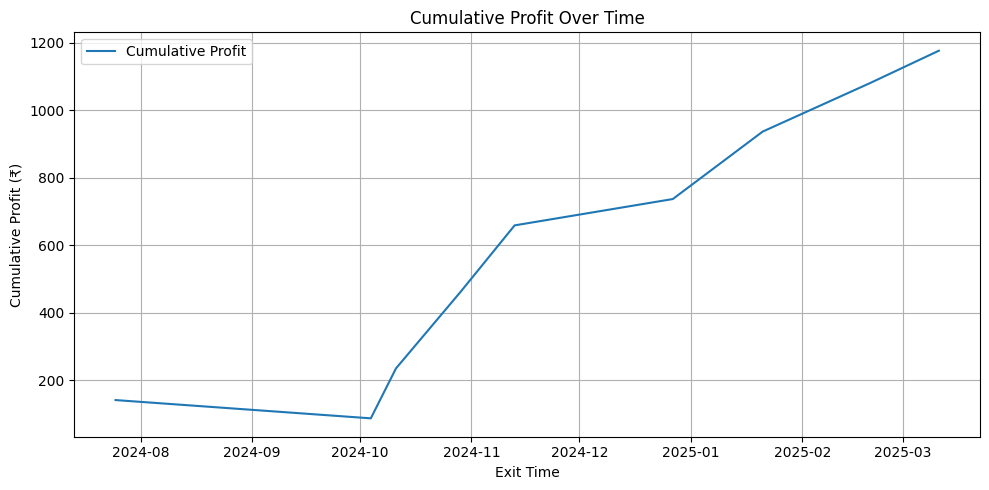

Total Trades: 9
Win Rate: 88.89%
Sharpe Ratio: 4.64
Max Drawdown: ₹54.14
Total Profit: ₹1176.47
Total Return: 11.76%
Win Rate: 88.89%
Sharpe Ratio: 4.64
Total Profit: ₹1176.47
Total Return: 11.76%
✅ Trade log saved to trade_log.csv


In [55]:
pairs_trading_with_metrics(stock1_name="HDFCBANK.NS", stock2_name="ICICIBANK.NS", data_dict=data_dict)